In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
seed_urls = ['https://inshorts.com/en/read/entertainment', 'https://inshorts.com/en/read/sports', 'https://inshorts.com/en/read/politics']

def build_dataset(seed_urls):
    news_data = []
    for url in seed_urls:
        news_category = url.split('/')[-1]
        data = requests.get(url)
        soup = BeautifulSoup(data.content, 'html.parser')
        
        news_articles = [{
            'news_headline':headline.find('span', attrs={"itemprop":"headline"}).string,
            'news_article':article.find('div', attrs={"itemprop":"articleBody"}).string,
            'news_category':news_category}
            for headline, article in
            zip(soup.find_all('div', class_=["news-card-title news-right-box"]),
                soup.find_all('div', class_=["news-card-content news-right-box"]))
        ]
        news_data.extend(news_articles)
    df = pd.DataFrame(news_data)
    df = df[['news_headline', 'news_article', 'news_category']]
    return df

In [3]:
news_df = build_dataset(seed_urls)
news_df.head(10)

,news_headline,news_article,news_category
0,I've only been given 2 bananas that had flies ...,"Kanika Kapoor, who's in the Isolation Corona W...",entertainment
1,BJP MP who met coronavirus +ve Kanika Kapoor l...,BJP MP Dushyant Singh attended a breakfast hos...,entertainment
2,Inheritance is distasteful: Daniel Craig on no...,Daniel Craig has said he won't be leaving his ...,entertainment
3,Sonam says India was not self-isolating when K...,Sonam Kapoor has come out in support of Kanika...,entertainment
4,"Raveena cleans train seats with sanitiser, say...",Raveena Tandon on Friday took to Instagram to ...,entertainment
5,Didn't hide in airport toilet to skip screenin...,"Singer Kanika Kapoor, who's infected with coro...",entertainment
6,"Vasundhara Raje, who attended party with Kanik...",Former Rajasthan Chief Minister Vasundhara Raj...,entertainment
7,TV show host Andy Cohen tests +ve for COVID-19...,American TV show host Andy Cohen has revealed ...,entertainment
8,Ekta does safe hands challenge amid coronaviru...,Producer Ekta Kapoor was trolled online for we...,entertainment
9,Anil sings 'childhood time song' to Anupam who...,Anil Kapoor tweeted a video wherein he can be ...,entertainment


In [4]:
news_df.news_category.value_counts()

entertainment    25
sports           25
politics         25
Name: news_category, dtype: int64

In [5]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [6]:
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
import unicodedata

In [7]:
nlp = spacy.load('en_core_web_sm', parse=True, tag=True, entity=True)
tokenizer = ToktokTokenizer()
stopwords_list = nltk.corpus.stopwords.words('english')
stopwords_list.remove('no')
stopwords_list.remove('not')

In [8]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, 'html.parser')
    stripped_text = soup.get_text()
    return stripped_text

# strip_html_tags('<html><h2>Some important text</h2></html>')

In [9]:
def remove_accented_characters(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text
# remove_accented_characters('Sómě Áccěntěd těxt')

In [10]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())
        expanded_contraction = first_char + expanded_contraction[1:]
        return expanded_contraction
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [11]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [12]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

In [13]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [14]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords_list]
    
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [15]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True,
                     text_lemmatization=True, special_char_removal=True,
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    for doc in corpus:
        if html_stripping:
            doc = strip_html_tags(doc)
        if accented_char_removal:
            doc = remove_accented_characters(doc)
        if contraction_expansion:
            doc = expand_contractions(doc)
        if text_lower_case:
            doc = doc.lower()
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        if text_lemmatization:
            doc = lemmatize_text(doc)
        if special_char_removal:
            special_pattern = re.compile(r'([{.(-)!}])')
            doc = special_pattern.sub(' \\1 ', doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)
        doc = re.sub(' +', ' ', doc)
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
        
        normalized_corpus.append(doc)
    return normalized_corpus

In [16]:
news_df['full_text'] = news_df['news_headline'].map(str) + '. ' + news_df['news_article']

news_df['clean_text'] = normalize_corpus(news_df['full_text'])
norm_corpus = list(news_df['clean_text'])

news_df.iloc[1][['full_text', 'clean_text']].to_dict()

{'full_text': "BJP MP who met coronavirus +ve Kanika Kapoor later dined with Prez, Union Ministers. BJP MP Dushyant Singh attended a breakfast hosted by President Ram Nath Kovind on March 18, two days after attending a party with singer Kanika Kapoor who has tested positive for coronavirus. At the Rashtrapati Bhavan, he met several MPs and Union Ministers like Smriti Irani. Singh, who's currently in self-quarantine, had also shared a picture after attending the breakfast.",
 'clean_text': 'bjp mp meet coronavirus kanika kapoor later dine prez union minister bjp mp dushyant singh attend breakfast host president ram nath kovind march two day attend party singer kanika kapoor test positive coronavirus rashtrapati bhavan meet several mps union minister like smriti irani singh currently self quarantine also share picture attend breakfast'}

In [17]:
news_df.to_csv('news.csv', index=False, encoding='utf-8')

In [18]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Y.SAHITH\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [19]:
corpus = normalize_corpus(news_df['full_text'], text_lower_case=False, text_lemmatization=False, special_char_removal=False)
# print(corpus)

sentence = str(news_df.iloc[1].news_headline)
# print(sentence)
sentence_nlp = nlp(sentence)
# print(sentence_nlp)

# POS tagging with Spacy 
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
# print(spacy_pos_tagged)
df1 = pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type'])
print(df1.head(5))

# POS tagging with nltk
nltk_pos_tagged = nltk.pos_tag(sentence.split())
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag'])

          Word POS tag Tag type
0          BJP     NNP    PROPN
1           MP     NNP    PROPN
2          who      WP     PRON
3          met     VBD     VERB
4  coronavirus     NNP    PROPN


,Word,POS tag
0,BJP,NNP
1,MP,NNP
2,who,WP
3,met,VBD
4,coronavirus,NN
5,+ve,NNP
6,Kanika,NNP
7,Kapoor,NNP
8,later,RB
9,dined,VBD


In [54]:
nltk.download('conll2000')

[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\Y.SAHITH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\conll2000.zip.


True

In [20]:
from nltk.corpus import conll2000

data = conll2000.chunked_sents()
train_data = data[:10900]
test_data = data[10900:]

print(len(train_data), len(test_data))
print(train_data[1])

10900 48
(S
  Chancellor/NNP
  (PP of/IN)
  (NP the/DT Exchequer/NNP)
  (NP Nigel/NNP Lawson/NNP)
  (NP 's/POS restated/VBN commitment/NN)
  (PP to/TO)
  (NP a/DT firm/NN monetary/JJ policy/NN)
  (VP has/VBZ helped/VBN to/TO prevent/VB)
  (NP a/DT freefall/NN)
  (PP in/IN)
  (NP sterling/NN)
  (PP over/IN)
  (NP the/DT past/JJ week/NN)
  ./.)


In [21]:
from nltk.chunk.util import tree2conlltags, conlltags2tree

wtc = tree2conlltags(train_data[1])
wtc

[('Chancellor', 'NNP', 'O'),
 ('of', 'IN', 'B-PP'),
 ('the', 'DT', 'B-NP'),
 ('Exchequer', 'NNP', 'I-NP'),
 ('Nigel', 'NNP', 'B-NP'),
 ('Lawson', 'NNP', 'I-NP'),
 ("'s", 'POS', 'B-NP'),
 ('restated', 'VBN', 'I-NP'),
 ('commitment', 'NN', 'I-NP'),
 ('to', 'TO', 'B-PP'),
 ('a', 'DT', 'B-NP'),
 ('firm', 'NN', 'I-NP'),
 ('monetary', 'JJ', 'I-NP'),
 ('policy', 'NN', 'I-NP'),
 ('has', 'VBZ', 'B-VP'),
 ('helped', 'VBN', 'I-VP'),
 ('to', 'TO', 'I-VP'),
 ('prevent', 'VB', 'I-VP'),
 ('a', 'DT', 'B-NP'),
 ('freefall', 'NN', 'I-NP'),
 ('in', 'IN', 'B-PP'),
 ('sterling', 'NN', 'B-NP'),
 ('over', 'IN', 'B-PP'),
 ('the', 'DT', 'B-NP'),
 ('past', 'JJ', 'I-NP'),
 ('week', 'NN', 'I-NP'),
 ('.', '.', 'O')]

In [22]:
def conll_tag_chunks(chunk_sents):
    tagged_sents = [tree2conlltags(tree) for tree in chunk_sents]
    return [[(t, c) for (w, t, c) in sent] for sent in tagged_sents]

def combined_tagger(train_data, taggers, backoff=None):
    for tagger in taggers:
        backoff = tagger(train_data, backoff=backoff)
    return backoff

In [23]:
from nltk.tag import UnigramTagger, BigramTagger
from nltk.chunk import ChunkParserI

class NGramTagChunker(ChunkParserI):
    def __init__(self, train_sentences, tagger_classes=[UnigramTagger, BigramTagger]):
        train_sent_tags = conll_tag_chunks(train_sentences)
        self.chunk_tagger = combined_tagger(train_sent_tags, tagger_classes)
    def parse(self, tagged_sentence):
        if not tagged_sentence:
            return None
        pos_tags = [tag for word, tag in tagged_sentence]
        chunk_pos_tags = self.chunk_tagger.tag(pos_tags)
        chunk_tags = [chunk_tag for (pos_tag, chunk_tag) in chunk_pos_tags]
        wpc_tags = [(word, pos_tag, chunk_tag) for ((word, pos_tag), chunk_tag) in zip(tagged_sentence, chunk_tags)]
        
        return conlltags2tree(wpc_tags)

ntc = NGramTagChunker(train_data)
print(ntc.evaluate(test_data))

ChunkParse score:
    IOB Accuracy:  90.0%%
    Precision:     82.1%%
    Recall:        86.3%%
    F-Measure:     84.1%%


In [24]:
chunk_tree = ntc.parse(nltk_pos_tagged)
print(chunk_tree)

(S
  (NP BJP/NNP MP/NNP)
  (NP who/WP)
  (VP met/VBD)
  (NP coronavirus/NN +ve/NNP Kanika/NNP Kapoor/NNP)
  later/RB
  (VP dined/VBD)
  (PP with/IN)
  (NP Prez,/NNP Union/NNP Ministers/NNP))


In [29]:
import os

java_path = r'C:\Program Files\Java\jdk1.8.0_181\bin\java.exe'
os.environ['JAVAHOME'] = java_path

from nltk.parse.stanford import StanfordParser
scp = StanfordParser(path_to_jar='C:\\Users\\Y.SAHITH\\Downloads\\stanford-parser-full-2015-04-20\\stanford-parser.jar', path_to_models_jar='C:\\Users\\Y.SAHITH\\Downloads\\stanford-parser-full-2015-04-20\\stanford-parser-3.5.2-models.jar')

result = list(scp.raw_parse(sentence))
print(result[0])

c:\users\y.sahith\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: The StanfordParser will be deprecated
Please use nltk.parse.corenlp.StanforCoreNLPParser instead.
  import sys


(ROOT
  (S
    (NP
      (NP (NNP BJP) (NNP MP))
      (SBAR (WHNP (WP who)) (S (VP (VBD met)))))
    (VP
      (VBZ coronavirus)
      (NP
        (NP (NNP +) (NNP ve) (NNP Kanika) (NNP Kapoor))
        (VP
          (ADVP (RB later))
          (VBN dined)
          (PP
            (IN with)
            (NP
              (NP (NNP Prez))
              (, ,)
              (NP (NNP Union) (NNP Ministers)))))))))


In [31]:
dependency_pattern = '{left}<---{word}[{w_type}]--->{right}\n--------'
for token in sentence_nlp:
    print(dependency_pattern.format(word=token.orth_, 
                                  w_type=token.dep_,
                                  left=[t.orth_ 
                                            for t 
                                            in token.lefts],
                                  right=[t.orth_ 
                                             for t 
                                             in token.rights]))

[]<---BJP[compound]--->[]
--------
['BJP']<---MP[ROOT]--->['met']
--------
[]<---who[nsubj]--->[]
--------
['who']<---met[relcl]--->['coronavirus']
--------
[]<---coronavirus[dobj]--->['+', 'Kapoor']
--------
[]<---+[cc]--->[]
--------
[]<---ve[compound]--->[]
--------
[]<---Kanika[compound]--->[]
--------
['ve', 'Kanika']<---Kapoor[conj]--->['dined']
--------
[]<---later[advmod]--->[]
--------
['later']<---dined[acl]--->['with']
--------
[]<---with[prep]--->['Prez']
--------
[]<---Prez[pobj]--->[',', 'Ministers']
--------
[]<---,[punct]--->[]
--------
[]<---Union[compound]--->[]
--------
['Union']<---Ministers[appos]--->[]
--------


In [32]:
from spacy import displacy

displacy.render(sentence_nlp, jupyter=True, 
                options={'distance': 110,
                         'arrow_stroke': 2,
                         'arrow_width': 8})

In [35]:
from nltk.parse.stanford import StanfordDependencyParser
sdp = StanfordDependencyParser(path_to_jar='C:\\Users\\Y.SAHITH\\Downloads\\stanford-parser-full-2015-04-20\\stanford-parser.jar',
                               path_to_models_jar='C:\\Users\\Y.SAHITH\\Downloads\\stanford-parser-full-2015-04-20\\stanford-parser-3.5.2-models.jar')
result = list(sdp.raw_parse(sentence))

# print the dependency tree
dep_tree = [parse.tree() for parse in result][0]
print(dep_tree)

c:\users\y.sahith\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The StanfordDependencyParser will be deprecated
Please use nltk.parse.corenlp.StanforCoreNLPDependencyParser instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(coronavirus
  (MP BJP (met who))
  (Kapoor + ve Kanika (dined later (Prez with (Ministers Union)))))


# Entity Recognition

In [36]:
sentence = str(news_df.iloc[1].full_text)
sentence_nlp = nlp(sentence)

# print named entities in article
print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])

# visualize named entities
displacy.render(sentence_nlp, style='ent', jupyter=True)

[(BJP, 'ORG'), (Kanika, 'PERSON'), (Kapoor, 'PERSON'), (Prez, 'PERSON'), (BJP, 'ORG'), (Dushyant, 'PERSON'), (Singh, 'PERSON'), (Ram, 'PERSON'), (Nath, 'PERSON'), (Kovind, 'PERSON'), (March, 'DATE'), (18, 'DATE'), (,, 'DATE'), (two, 'DATE'), (days, 'DATE'), (Kanika, 'PERSON'), (Kapoor, 'PERSON'), (the, 'FAC'), (Rashtrapati, 'FAC'), (Bhavan, 'FAC'), (Smriti, 'PERSON'), (Irani, 'PERSON'), (Singh, 'PERSON')]


In [37]:
named_entities = []
for sentence in corpus:
    temp_entity_name = ''
    temp_named_entity = None
    sentence = nlp(sentence)
    for word in sentence:
        term = word.text 
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])

In [38]:
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Name,Congress,BJP,Kanika Kapoor,Indian,India,Pakistan,Supreme Court,Kanika,first,Mumbai,Rajya Sabha,22,Chhetri,PCB,World Cup
Entity Type,ORG,ORG,PERSON,NORP,GPE,GPE,ORG,ORG,ORDINAL,GPE,PERSON,CARDINAL,ORG,ORG,EVENT
Frequency,16,15,9,8,8,7,5,5,4,4,4,4,4,4,3


In [39]:
top_entities = (entity_frame.groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Type,PERSON,ORG,DATE,GPE,CARDINAL,NORP,EVENT,PRODUCT,ORDINAL,LAW,TIME,LOC,WORK_OF_ART,QUANTITY,FAC
Frequency,209,152,69,59,40,20,12,7,6,6,5,4,3,3,3


# Sentiment Analysis

In [41]:
from afinn import Afinn
af = Afinn()

sentiment_scores = [af.score(article) for article in corpus]
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]
    
    
# sentiment statistics per news category
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores, sentiment_category]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

sentiment_score                                           
                        count  mean       std   min  25%  50%  75%   max
news_category                                                           
entertainment            25.0  0.84  7.564611 -15.0 -5.0  1.0  5.0  19.0
politics                 25.0 -1.04  6.065476  -9.0 -4.0 -2.0  2.0  13.0
sports                   25.0 -0.36  7.761443 -26.0 -4.0  0.0  6.0  11.0

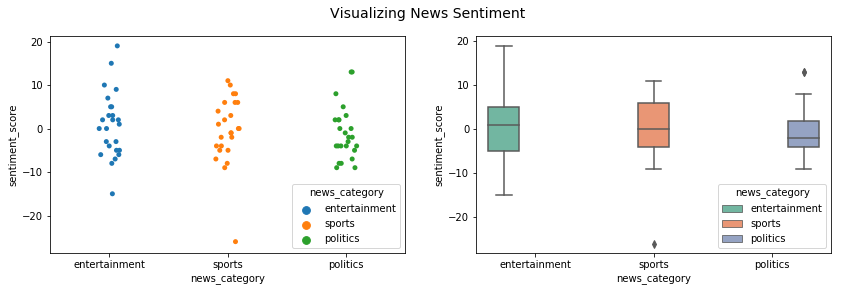

In [42]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='news_category', y="sentiment_score",
                   hue='news_category', data=df, ax=ax1)
bp = sns.boxplot(x='news_category', y="sentiment_score",
                 hue='news_category', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing News Sentiment', fontsize=14)

c:\users\y.sahith\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


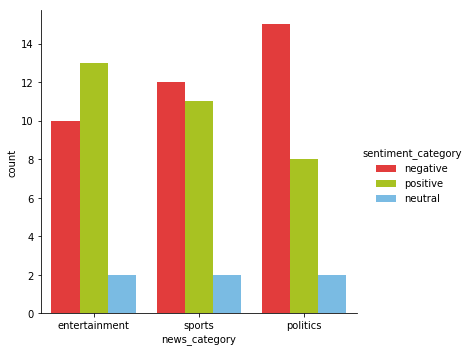

In [43]:
fc = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [72]:
pos_idx = df[(df.news_category == 'entertainment') & (df.sentiment_score == 5)].index[0]
neg_idx = df[(df.news_category=='entertainment') & (df.sentiment_score == -15)].index[0]
print('Most Negative Entertainment News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive Entertainment News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative Entertainment News Article: Talking about the hanging of Nirbhaya gangrape and murder case convicts, Kangana Ranaut said, "It took seven...years for our judicial system to give verdict on a...case that shook the entire nation." "Indirectly we have tortured Nirbhaya's mother and the entire family for seven long years," she stated. Kangana added that there should be quick justice for such brutal crimes.

Most Positive Entertainment News Article: BJP MP Dushyant Singh attended a breakfast hosted by President Ram Nath Kovind on March 18, two days after attending a party with singer Kanika Kapoor who has tested positive for coronavirus. At the Rashtrapati Bhavan, he met several MPs and Union Ministers like Smriti Irani. Singh, who's currently in self-quarantine, had also shared a picture after attending the breakfast.


# Sentiment Analysis with TextBlob

In [73]:
from textblob import TextBlob

sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in news_df['clean_text']]
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores_tb, sentiment_category_tb]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

sentiment_score                                                \
                        count     mean       std    min    25%   50%    75%   
news_category                                                                 
entertainment            25.0  0.10260  0.184726 -0.225  0.000  0.07  0.194   
politics                 25.0  0.10272  0.233721 -0.250  0.000  0.00  0.141   
sports                   25.0  0.03432  0.174020 -0.400 -0.036  0.00  0.151   

                      
                 max  
news_category         
entertainment  0.500  
politics       0.800  
sports         0.393

c:\users\y.sahith\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


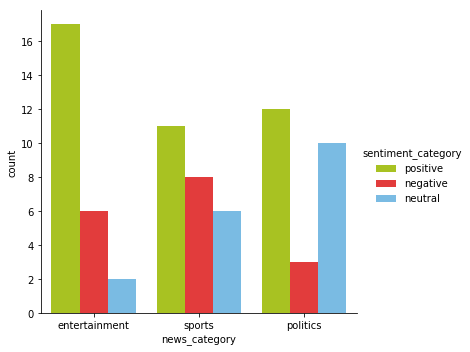

In [74]:
fc = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [110]:
import model_evaluation_utils as meu
meu.display_confusion_matrix_pretty(true_labels=sentiment_category, 
                                    predicted_labels=sentiment_category_tb, 
                                    classes=['negative', 'neutral', 'positive'])

ModuleNotFoundError: No module named 'model_evaluation_utils'